In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [2]:
from medvqa.models.model_debugging_utils import load_and_run_fact_encoder_in_inference_mode

In [3]:
from importlib import reload
import medvqa

In [6]:
reload(medvqa.models.model_debugging_utils)

<module 'medvqa.models.model_debugging_utils' from '/home/pamessina/medvqa/medvqa/models/model_debugging_utils.py'>

In [9]:
# facts = ["minimal radiolucency adjacent to the lateral aspect of the aortic knob", "vascular stents in the region of the right upper arm", "calcified vessels projecting over the right portion of the mediastinum", "no focal lung abnormality", "no specific abnormality in the lungs", "Chondroid matrix visualized in the left humeral head", "Chondroid matrix identified within the left humeral head", "no concentrated lung shadowing", "calcified vessels observed over the right aspect of the mediastinum", "vascular stents in the axilla", "no evident skeletal abnormality", "possible coronary stent", "no sharpness of the descending aorta", "no significant abnormal findings", "no evidence of acute consolidation in the heart or lungs", "opacity previously seen in the retrocardiac region is no longer evident", "region at the top of the sternum", "The previously noted opacity is no longer apparent", "right carotid artery branching spot", "site of the previously identified subclavian pseudoaneurysm"]
# facts = ["no pneumonia", "no focal lung abnormality", "no concentrated lung shadowing", "no specific abnormality in the lungs", "no primary process in the lung", "focal parenchymal abnormality", "focal area of abnormality", "Patches of consolidation", "no acute intrathoracic process concerning for infection", "pneumonia", "no features of pneumonia", "no correlating of pneumonia", "No focal opacity concerning for infectious process identified", "spot of consolidation", "eliminate acute lung pathology", "Lack of consolidation, indicating no signs of pneumonia", "The previously noted opacity is no longer apparent", "lungs without sign of consolidation", "no evident skeletal abnormality", "focal pneumonia", "territory of consolidation"]
facts = [
    'calcified vessels observed over the right aspect of the mediastinum',
    'Normal heart',
    'osteoporosis',
    'Generally appropriate configuration',
    'opacities',
    'Enlarged cardiac sillhoute',
    'Normal heart size',
    'No cardiomegaly',
    'Heart size is normal',
    'worsening of osteoporosis',
    "Consolidation in the lungs",
    'No significant interval change in the small right apical pneumothorax',
    """Leads extending into the region of the right atrium""",
    "Ground-glass opacities",
    'No evidence of acute consolidation in the heart or lungs',
    'opacity',
    'unchanged mild cardiomegaly , elevation of the left hemidiaphragm and atelectasis at the left lung bases .',
    'lung volumes lower today than in xxxx or more recently compared to xxxx , is explained by persistent bibasilar atelectasis , more severe on the right .',
    'Although the right lung with cephalization and background interstitial abnormality is likely pulmonary edema, either on the basis of volume overload, cardiac decompensation or blood transfusion-related acute lung injury, left lung has a distinctly and progressively nodular abnormality, although occasionally pulmonary edema present as acinar filling with round opacities likely these, one cannot make that assumption and I discussed with Dr. ___ ___ possibility of disseminated infection, including septicemia.'
    'The chest tube is in the wrong position',
    
     "Pulmonary infiltrates",
  "Opacity in the lung fields",
  "Hazy lung fields",
  "Patchy opacities",
  "Alveolar opacities",
  "Interstitial opacities",
  "Nodular opacities",
  "Bilateral lung opacities",
    
    'Residual right internal jugular catheter',
    
    'no specific abnormality in the lungs',
    'minimal radiolucency adjacent to the lateral aspect of the aortic knob',
    'vascular stents in the region of the right upper arm',
    'calcified vessels projecting over the right portion of the mediastinum',
    'no focal lung abnormality',
    'no concentrated lung shadowing',
    'vascular stents in the axilla',
    'no evident skeletal abnormality',
    'possible coronary stent',
    'no sharpness of the descending aorta',
    'no significant abnormal findings',
    'no evidence of acute consolidation in the heart or lungs',
    'opacity previously seen in the retrocardiac region is no longer evident',
    'region at the top of the sternum',
    'right carotid artery branching spot',
    'site of the previously identified subclavian pseudoaneurysm',
    'calcific tendinosis in the right supraspinatus tendon',
    'major artery in the axillary region',
    'calcification adjacent to the left of the trachea',
    
    
    """Peripheral band-like opacities in left mid and lower lung""",
    """Aortic mass adjacent to the left heart border""",
    """Atelectasis in the lingular segment of the left lobe""",
    """The doctor left the room""",
    
    
    """Progression of asymmetrical left perihilar opacification""",
    """Left distended stomach""",
    """Grossly large thoracic aorta""",
    """Progression of asymmetrical left perihilar opacification""",
    """Obscured left heart border by airspace process""",
    
     'Upper thoracic trachea',
     'Engorgement of pulmonary vascular congestion',
     'Radioopaque material',
     'Tip of chest tube at the level of top of aorta',
     '2 leads in the expected location of the right ventricle',
     
     'Correlation with cross-sectional imaging (chest CT)',
     'Right greater than left infrahilar opacities',
    'Heart larger compared to previus',
    'right pleural effusion similar in size',
    'pleural density on the left is somewhat increased',
    'new bibasal consolidations on the left',
    'small foci of opacity in the left mid lung',
    'no ill-definition of right hemidiaphragm',
    'heart within upper limits of normal in size',
    'no significant change in size of pneumothorax',
    'osteoporosis worsening in a debilitated and wheelchair-bound patient',
    'osteoporosis worsening in a debilitated and wheelchair-bound patient compared',
    'the size of the tumor is roughly the same',
]
chest_imagenome_observations = [
    'airspace opacity',
    'atelectasis',
    'bone lesion',
    'bronchiectasis',
    'calcified nodule',
    'clavicle fracture',
    'consolidation',
    'costophrenic angle blunting',
    'cyst/bullae',
    'diaphragmatic eventration (benign)',
    'elevated hemidiaphragm',
    'enlarged cardiac silhouette',
    'enlarged hilum',
    'hernia',
    'hydropneumothorax',
    'hyperaeration',
    'increased reticular markings/ild pattern',
    'infiltration',
    'linear/patchy atelectasis',
    'lobar/segmental collapse',
    'lung lesion',
    'lung opacity',
    'mass/nodule (not otherwise specified)',
    'mediastinal displacement',
    'mediastinal widening',
    'multiple masses/nodules',
    'pleural effusion',
    'pleural/parenchymal scarring',
    'pneumomediastinum',
    'pneumothorax',
    'pulmonary edema/hazy opacity',
    'rib fracture',
    'scoliosis',
    'shoulder osteoarthritis',
    'spinal degenerative changes',
    'spinal fracture',
    'sub-diaphragmatic air',
    'subcutaneous air',
    'superior mediastinal mass/enlargement',
    'tortuous aorta',
    'vascular calcification',
    'vascular congestion',
    'vascular redistribution',
    'aortic graft/repair',
    'cabg grafts',
    'cardiac pacer and wires',
    'prosthetic valve',
    'alveolar hemorrhage',
    'aspiration',
    'copd/emphysema',
    'fluid overload/heart failure',
    'goiter',
    'granulomatous disease',
    'interstitial lung disease',
    'lung cancer',
    'pericardial effusion',
    'pneumonia',
    'artifact',
    'breast/nipple shadows',
    'low lung volumes',
    'rotated',
    'skin fold',
    'chest port',
    'chest tube',
    'endotracheal tube',
    'enteric tube',
    'ij line',
    'intra-aortic balloon pump',
    'mediastinal drain',
    'picc',
    'pigtail catheter',
    'subclavian line',
    'swan-ganz catheter',
    'tracheostomy tube',
]
chest_imagenome_anatomical_locations = [
    'abdomen',
    'aortic arch',
    'cardiac silhouette',
    'carina',
    'cavoatrial junction',
    'left apical zone',
    'left arm',
    'left breast',
    'left chest wall',
    'left clavicle',
    'left costophrenic angle',
    'left hemidiaphragm',
    'left hilar structures',
    'left lower lung zone',
    'left lung',
    'left mid lung zone',
    'left shoulder',
    'left upper lung zone',
    'mediastinum',
    'neck',
    'right apical zone',
    'right arm',
    'right atrium',
    'right breast',
    'right chest wall',
    'right clavicle',
    'right costophrenic angle',
    'right hemidiaphragm',
    'right hilar structures',
    'right lower lung zone',
    'right lung',
    'right mid lung zone',
    'right shoulder',
    'right upper lung zone',
    'spine',
    'svc',
    'trachea',
    'upper mediastinum',
]
load_and_run_fact_encoder_in_inference_mode(
    facts=facts,
    chest_imagenome_observations=chest_imagenome_observations,
    chest_imagenome_anatomical_locations=chest_imagenome_anatomical_locations,
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230719_132018_MIMIC-CXR(GPT3.5+CXR-Bert-based-labels)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230721_061431_MIMIC-CXR(GPT3,.5+CXR-Bert-based-labels)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230723_122122_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230728_075327_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230730_012705_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230820_223655_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-BioViL-T)',
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230822_184328_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
#     model_folder_path = "/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230914_150704_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230915_175012_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
#     model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230916_194059_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
    model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230925_020631_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph,NLI)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
    use_amp=False,
    device='GPU',
)

metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230925_020631_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph,NLI)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/metadata.json
device =  GPU
Create model
Fact encoder
  huggingface_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
  embedding_size: 128
  classify_category: True
  n_categories: 6
  classify_health_status: True
  n_health_statuses: 5
  classify_comparison_status: True
  n_comparison_statuses: 15
  classify_chest_imagenome_obs: True
  n_chest_imagenome_observations: 74
  classify_chest_imagenome_anatloc: True
  n_chest_imagenome_anatomical_locations: 38
  use_aux_task_hidden_layer: True
  aux_task_hidden_layer_size: 512
  do_nli: True
  nli_hidden_layer_size: 128


Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Load model weights
checkpoint_names = ['checkpoint_38_cacc+chf1+chf1+cscc+encc+hscc+nlcc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9311.pt']
model_checkpoint_path =  /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230925_020631_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph,NLI)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/checkpoint_38_cacc+chf1+chf1+cscc+encc+hscc+nlcc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9311.pt


Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Run model in inference mode
embeddings.shape = (74, 128)
c_logits.shape = torch.Size([74, 6])
hs_logits.shape = torch.Size([74, 5])
cs_logits.shape = torch.Size([74, 15])
cio_logits.shape = torch.Size([74, 74])
cia_logits.shape = torch.Size([74, 38])
Query: calcified vessels observed over the right aspect of the mediastinum
	Category: anatomical finding
	Health status: abnormal
	Comparison status: no comparison
	Chest Imagenome observations:
		mediastinal widening
		vascular calcification
	Chest Imagenome anatomical locations:
		mediastinum
----------------
Fact 0: calcified vessels observed over the right aspect of the mediastinum
	Category: anatomical finding
	Health status: abnormal
	Comparison status: no comparison
	Chest Imagenome observations:
		mediastinal widening
		vascular calcification
	Chest Imagenome anatomical locations:
		mediastinum
Fact 1: calcified vessels projecting over the right portion of the mediastinum
	Category: anatomical finding
	Health status: abnormal
	Comp

In [4]:
from medvqa.models.model_debugging_utils import run_fact_encoder_nli

In [9]:
run_fact_encoder_nli(
    premises=[
        'Lungs are well-expanded and clear without focal consolidation concerning for pneumonia.',
        'Elevation of the right hemidiaphragm is unchanged.',
        'Elevation of the right hemidiaphragm is unchanged.',
        'The cardiac silhouette and the left lung are normal.',
        'No pneumothorax.',
        'No acute osseous abnormality is visualized.',
        'There is no pleural effusion, focal consolidation or pneumothorax.',
        'There is no focal consolidation, pleural effusion, pneumothorax, or pulmonary edema.',
    ],
    hypotheses=[
        'Lungs are hyperinflated but clear.',
        'Elevation of the right hemidiaphragm is unchanged.',
        'There is a dobhoff coursing below the diaphragm, however the tip is not visualized.',
        'The cardiac and mediastinal silhouettes are unremarkable.',
        'No focal consolidation, pleural effusion, or pneumothorax is detected.',
        'There is no focal infiltrate.',
        'There is no focal consolidation, pleural effusion, pneumothorax, or pulmonary edema.',
        'There is no pleural effusion, focal consolidation or pneumothorax.',
    ],
    model_folder_path = '/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230921_095733_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)',
    use_amp=False,
    device='GPU',
)

metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230921_095733_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/metadata.json
device =  GPU
Create model
Fact encoder
  huggingface_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
  embedding_size: 128
  classify_category: True
  n_categories: 6
  classify_health_status: True
  n_health_statuses: 5
  classify_comparison_status: True
  n_comparison_statuses: 15
  classify_chest_imagenome_obs: True
  n_chest_imagenome_observations: 74
  classify_chest_imagenome_anatloc: True
  n_chest_imagenome_anatomical_locations: 38
  use_aux_task_hidden_layer: True
  aux_task_hidden_layer_size: 512
  do_nli: True
  nli_hidden_layer_size: 128


Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Load model weights
checkpoint_names = ['checkpoint_53_cacc+chf1+chf1+cscc+hscc+nlcc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9585.pt']
model_checkpoint_path =  /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230921_095733_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/checkpoint_53_cacc+chf1+chf1+cscc+hscc+nlcc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9585.pt


Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Run model in inference mode
Convert logits to labels
Results
Premise: Lungs are well-expanded and clear without focal consolidation concerning for pneumonia.
Hypothesis: Lungs are hyperinflated but clear.
Label: contradiction
----------------
Premise: Elevation of the right hemidiaphragm is unchanged.
Hypothesis: Elevation of the right hemidiaphragm is unchanged.
Label: entailment
----------------
Premise: Elevation of the right hemidiaphragm is unchanged.
Hypothesis: There is a dobhoff coursing below the diaphragm, however the tip is not visualized.
Label: neutral
----------------
Premise: The cardiac silhouette and the left lung are normal.
Hypothesis: The cardiac and mediastinal silhouettes are unremarkable.
Label: neutral
----------------
Premise: No pneumothorax.
Hypothesis: No focal consolidation, pleural effusion, or pneumothorax is detected.
Label: neutral
----------------
Premise: No acute osseous abnormality is visualized.
Hypothesis: There is no focal infiltrate.
Label: neut

In [4]:
from importlib import reload
import medvqa

In [48]:
reload(medvqa.models.huggingface_utils)

<module 'medvqa.models.huggingface_utils' from '/home/pamessina/medvqa/medvqa/models/huggingface_utils.py'>

In [5]:
from medvqa.models.huggingface_utils import TripletRankingEvaluator

In [4]:
tre = TripletRankingEvaluator(
    triplets_filepath='/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/triplets(4374074,318620,2395255,3002000,1000,1000).pkl',
    model_name='BiomedVLP-CXR-BERT-specialized',
    model_checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230915_175012_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/',
    batch_size=100,
    num_workers=4,
)

Loading triplets from /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/triplets(4374074,318620,2395255,3002000,1000,1000).pkl


In [302]:
res = tre.evaluate_triplet_ranking(split='test', category='observations', rule_index=7)

Evaluating triplet ranking on test split with category observations and rule "Hard negative triplets generated by ChatGPT"
triplets.shape = (1000, 3)


100%|███████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 436376.35it/s]


In [303]:
res.keys()

dict_keys(['accuracy', 'correct', 'AP', 'AN', 'anchors', 'positives', 'negatives'])

In [304]:
res['accuracy']

0.926

In [306]:
import numpy as np
import random

In [307]:
correct_idxs = np.where(res['correct'])[0]
incorrect_idxs = np.where(~res['correct'])[0]

In [317]:
i = random.choice(incorrect_idxs)
# i = random.choice(correct_idxs)
print(i)
print('anchor:', res['anchors'][i])
print('positive:', res['positives'][i])
print('negative:', res['negatives'][i])
print('AP:', res['AP'][i])
print('AN:', res['AN'][i])

796
anchor: square shaped areas of density/lucency in the right axilla
positive: Square-shaped patches of opacity/clearness in the right axillary area
negative: Elliptical regions of density/lucency in the right axilla
AP: 0.9592496
AN: 0.99741846


In [240]:
from medvqa.utils.files import load_jsonl

In [241]:
tmp = load_jsonl("/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(595880,60579117).improved_comparison(6741113).jsonl")

In [242]:
q = 'enchondroma'
for x in tmp:
    if x['fact'] == q:
        print(x)
        break

In [243]:
count = 0
for t in tre.triplets_data['train']['observations'][4]['triplets']:
    if tre.triplets_data['sentences'][t[0]] == q:
        print(tre.triplets_data['sentences'][t[1]])
        count += 1
        if count == 20:
            break

consistent with enchondroma in the left humeral head
non-cancerous cartilage growth
non-dangerous cartilage mass
Non-malignant mass resembling enchondroma
non-dangerous cartilage mass
non-threatening enchondroma
non-cancerous cartilage growth
non-metastatic enchondroma
non-cancerous cartilage growth
harmless cartilage lesion
Enchondroma detected in the proximal humerus on the left side
non-metastatic enchondroma
non-threatening enchondroma
most likely differential is an enchondroma
enchondroma in the left humeral neck
non-cancerous cartilage growth
The radiographic appearance is consistent with an enchondroma
non-malignant cartilaginous tumor
non-dangerous cartilage mass
non-threatening enchondroma


In [7]:
!python ../../eval_NLI.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_132315_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph,NLI)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--batch_size 100 \
--num_workers 2 \
--dev_mode

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_132315_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph,NLI)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   batch_size: 100
   num_workers: 2
   device: GPU
   plot_confusion_matrix: False
   train_mode: False
   dev_mode: True
   test_mode: False
----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_132315_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph,NLI)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/metadata.json
device =  GPU
Create model
Fact encoder
  huggingface_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
  embedding_size: 128
  classify_category: True
  n_categories: 6
  classify_health_status: True
  n_health_statuses: 5
  classify_comparison_status: True
  n_comparison_statuses: 15
  classify_chest_imagenome_ob

In [2]:
from importlib import reload
import medvqa

In [5]:
reload(medvqa.eval_NLI)

<module 'medvqa.eval_NLI' from '/home/pamessina/medvqa/medvqa/eval_NLI.py'>

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231002_152825_MIMIC-CXR(triplets+classif+entcont+nli+radgraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/metadata.json
device =  GPU
Create model
Fact encoder
  huggingface_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
  embedding_size: 128
  classify_category: True
  n_categories: 6
  classify_health_status: True
  n_health_statuses: 5
  classify_comparison_status: True
  n_comparison_statuses: 15
  classify_chest_imagenome_obs: True
  n_chest_imagenome_observations: 74
  classify_chest_imagenome_anatloc: True
  n_chest_imagenome_anatomical_locations: 38
  use_aux_task_hidden_layer: True
  aux_task_hidden_layer_size: 512
  do_nli: True
  nli_hidden_layer_size: 128
  use_spert: True
  spert_size_embedding: 25
  spert_relation_types: 3
  spert_entity_types: 5
  spert_max_pairs: 1000
  spert_prop_drop: 0.1
  spert_cls_token: 2


Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


self.model.config.hidden_size: 768
Load model weights
checkpoint_names = ['checkpoint_26_cacc+chf1+chf1+cscc+encc+hscc+nlcc+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9386.pt']
model_checkpoint_path =  /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231002_152825_MIMIC-CXR(triplets+classif+entcont+nli+radgraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/checkpoint_26_cacc+chf1+chf1+cscc+encc+hscc+nlcc+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9386.pt


Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Number of test samples: 480
Example test text:
Premise: No focal consolidations are noted.
Hypothesis: There is no significant change.
Label: neutral
----
Building test NLI dataset and dataloader...
Run evaluation


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.96it/s]


Accuracy = 0.7562


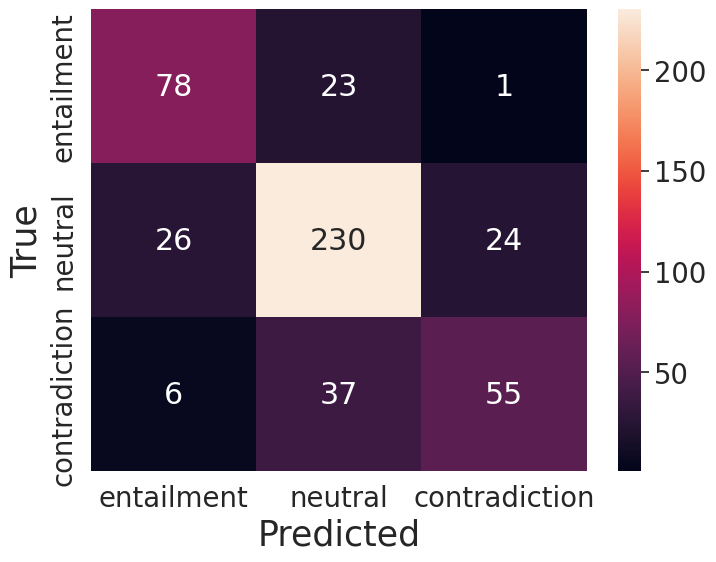

GPT4 vs GT accuracy = 0.8229
GPT4 vs Pred accuracy = 0.6896


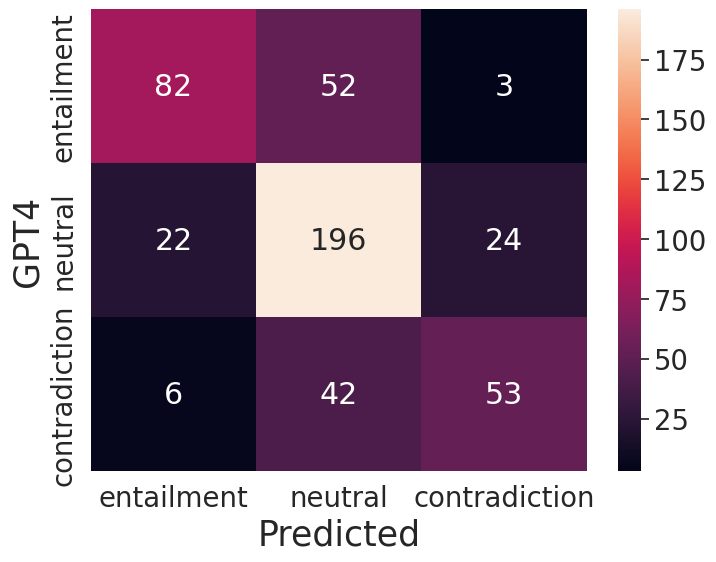

In [6]:
from medvqa.eval_NLI import evaluate
output = evaluate(
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230921_095733_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230922_150216_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_095955_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_113626_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_132315_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph,NLI)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_184632_NLI(MedNLI+RadNLI+GPT-4)_BerBasedNLI(microsoft-BiomedVLP-CXR-BERT-specialized,128,128)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230925_020631_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph,NLI)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
    checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231002_152825_MIMIC-CXR(triplets+classif+entcont+nli+radgraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
    batch_size=100,
    num_workers=2,
    plot_confusion_matrix=True,
    test_mode=True,
    compare_with_gpt4_predictions=True,
    gpt4_predictions_path="/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-0613_radnli_queries.jsonl",
#     use_bert_based_nli=True,
)

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231004_174626_MIMIC-CXR(triplets+classif+entcont+nli+radgraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/metadata.json
device =  GPU
Create model
Fact encoder
  huggingface_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
  embedding_size: 128
  classify_category: True
  n_categories: 6
  classify_health_status: True
  n_health_statuses: 5
  classify_comparison_status: True
  n_comparison_statuses: 15
  classify_chest_imagenome_obs: True
  n_chest_imagenome_observations: 74
  classify_chest_imagenome_anatloc: True
  n_chest_imagenome_anatomical_locations: 38
  use_aux_task_hidden_layer: True
  aux_task_hidden_layer_size: 512
  do_nli: True
  nli_hidden_layer_size: 128
  use_spert: True
  spert_size_embedding: 25
  spert_relation_types: 3
  spert_entity_types: 5
  spert_max_pairs: 1000
  spert_prop_drop: 0.1
  spert_cls_token: 2


Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


self.model.config.hidden_size: 768
Load model weights
checkpoint_names = ['checkpoint_50_cacc+chf1+chf1+cscc+encc+hscc+nlcc+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9373.pt']
model_checkpoint_path =  /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231004_174626_MIMIC-CXR(triplets+classif+entcont+nli+radgraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/checkpoint_50_cacc+chf1+chf1+cscc+encc+hscc+nlcc+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9373.pt


Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Number of test samples: 480
Example test text:
Premise: No large pleural effusion or pneumothorax.
Hypothesis: No effusion or pneumothorax is seen.
Label: neutral
----
Building test NLI dataset and dataloader...
Run evaluation


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.53it/s]


Accuracy = 0.7500


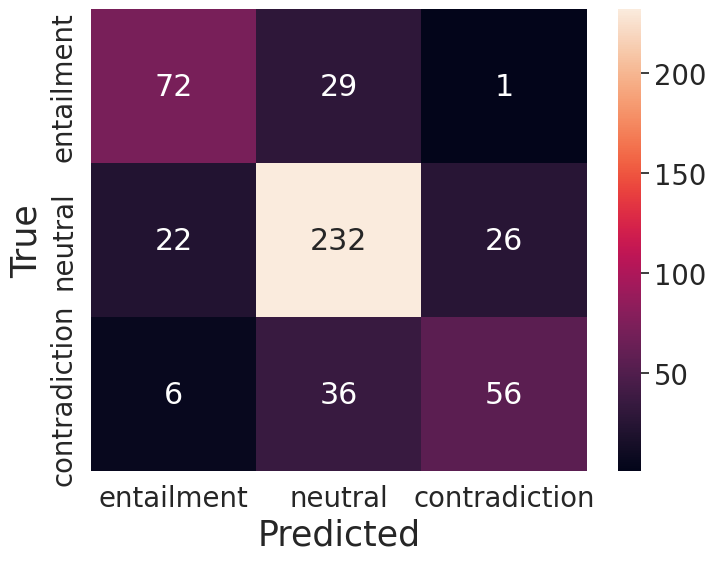

GPT4 vs GT accuracy = 0.8229
GPT4 vs Pred accuracy = 0.6833


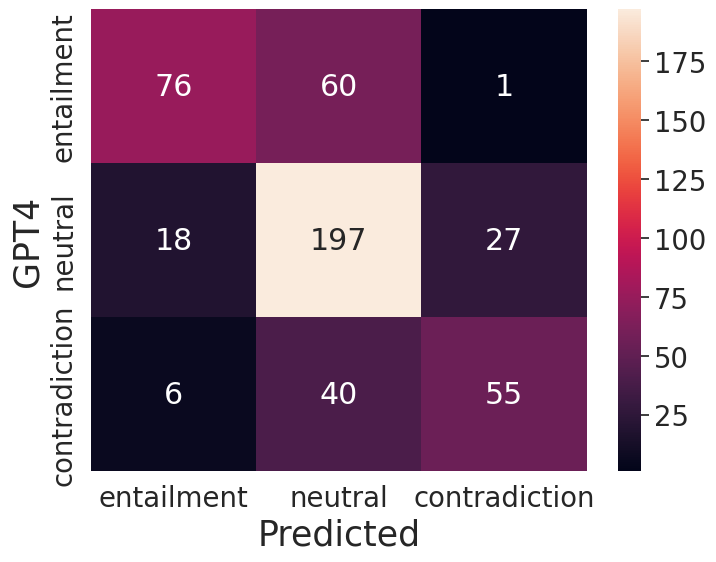

In [1]:
from medvqa.eval_NLI import evaluate
output = evaluate(
    checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231004_174626_MIMIC-CXR(triplets+classif+entcont+nli+radgraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/",
    batch_size=100,
    num_workers=2,
    plot_confusion_matrix=True,
    test_mode=True,
    compare_with_gpt4_predictions=True,
    gpt4_predictions_path="/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-0613_radnli_queries.jsonl",
#     use_bert_based_nli=True,
)

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231003_105607_NLI(MedNLI+RadNLI+GPT-4)_BerBasedNLI(microsoft-BiomedVLP-CXR-BERT-specialized,128,128)/metadata.json
device =  GPU
Create model
BertBasedNLI
  huggingface_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
  merged_input: False
  hidden_size: 128
  freeze_huggingface_model: False


Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Load model weights
checkpoint_names = ['checkpoint_72_nli_acc=0.8146.pt']
model_checkpoint_path =  /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231003_105607_NLI(MedNLI+RadNLI+GPT-4)_BerBasedNLI(microsoft-BiomedVLP-CXR-BERT-specialized,128,128)/checkpoint_72_nli_acc=0.8146.pt


Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Number of test samples: 480
Example test text:
Premise: Bilateral pleural effusions are seen, left greater than right.
Hypothesis: Increasing moderate left pleural effusion is present with adjacent left retrocardiac atelectasis.
Label: neutral
----
Building test NLI dataset and dataloader...
Run evaluation


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.85it/s]


Accuracy = 0.7979


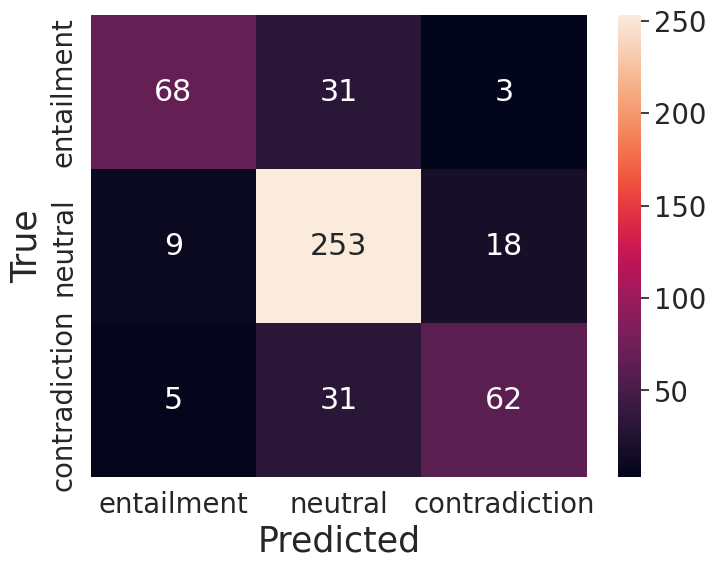

GPT4 vs GT accuracy = 0.8229
GPT4 vs Pred accuracy = 0.7104


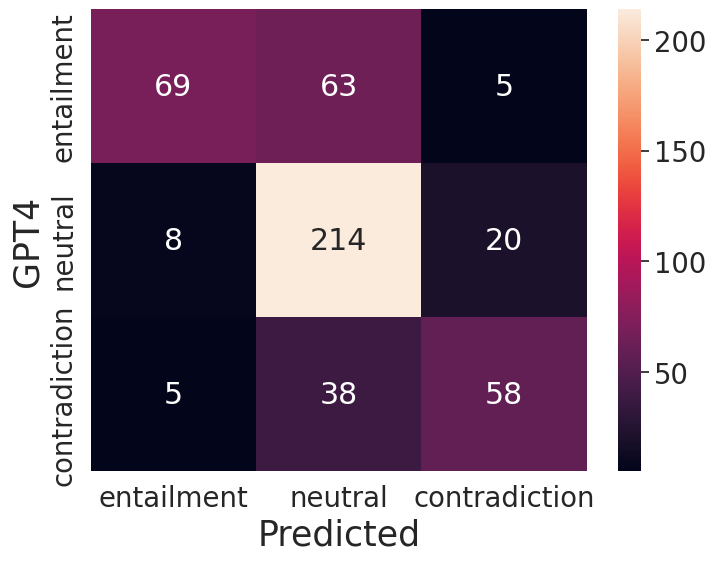

In [7]:
from medvqa.eval_NLI import evaluate
output = evaluate(
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230921_095733_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230922_150216_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_095955_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_113626_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_132315_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph,NLI)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
#     checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230923_184632_NLI(MedNLI+RadNLI+GPT-4)_BerBasedNLI(microsoft-BiomedVLP-CXR-BERT-specialized,128,128)",
    checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231003_105607_NLI(MedNLI+RadNLI+GPT-4)_BerBasedNLI(microsoft-BiomedVLP-CXR-BERT-specialized,128,128)",
    batch_size=100,
    num_workers=2,
    plot_confusion_matrix=True,
    test_mode=True,
    compare_with_gpt4_predictions=True,
    gpt4_predictions_path="/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-0613_radnli_queries.jsonl",
    use_bert_based_nli=True,
)

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231002_220207_MIMIC-CXR(triplets+entcon+nli)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/metadata.json
device =  GPU
Create model
Fact encoder
  huggingface_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
  embedding_size: 128
  classify_category: False
  n_categories: 6
  classify_health_status: False
  n_health_statuses: 5
  classify_comparison_status: False
  n_comparison_statuses: 15
  classify_chest_imagenome_obs: False
  n_chest_imagenome_observations: None
  classify_chest_imagenome_anatloc: False
  n_chest_imagenome_anatomical_locations: None
  use_aux_task_hidden_layer: False
  aux_task_hidden_layer_size: None
  do_nli: True
  nli_hidden_layer_size: 128
  use_spert: False
  spert_size_embedding: None
  spert_relation_types: None
  spert_entity_types: None
  spert_max_pairs: None
  spert_prop_drop: None
  spert_cls_token: None


Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Load model weights
checkpoint_names = ['checkpoint_52_encc+nlcc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9002.pt']
model_checkpoint_path =  /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231002_220207_MIMIC-CXR(triplets+entcon+nli)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/checkpoint_52_encc+nlcc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9002.pt


Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


Number of test samples: 480
Example test text:
Premise: There is no right pleural effusion.
Hypothesis: There is no overt pulmonary edema.
Label: neutral
----
Building test NLI dataset and dataloader...
Run evaluation


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.68it/s]


Accuracy = 0.7125


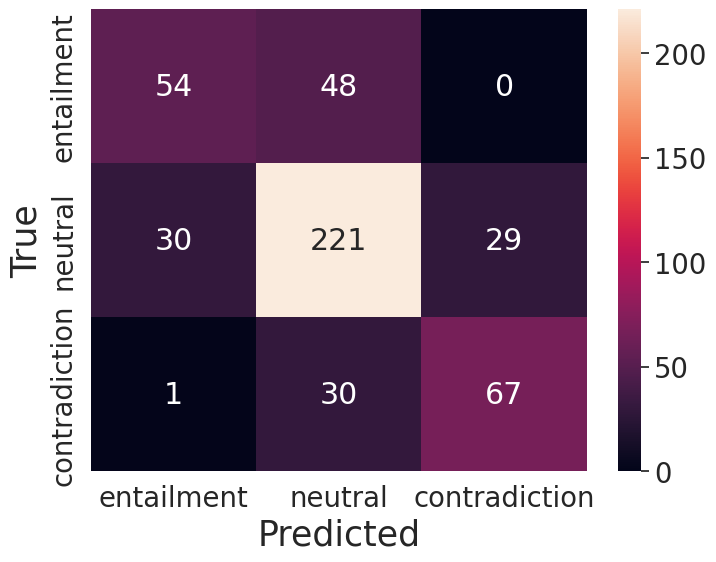

GPT4 vs GT accuracy = 0.8229
GPT4 vs Pred accuracy = 0.6354


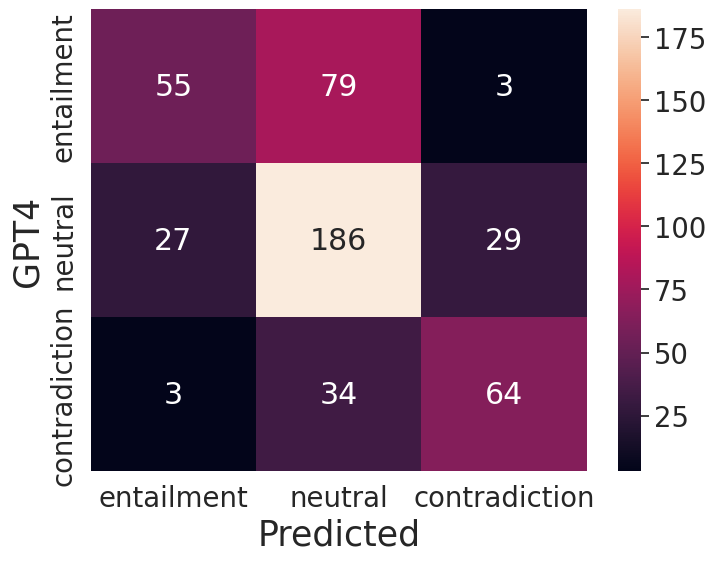

In [8]:
from medvqa.eval_NLI import evaluate
output = evaluate(
    checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231002_220207_MIMIC-CXR(triplets+entcon+nli)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/",
    batch_size=100,
    num_workers=2,
    plot_confusion_matrix=True,
    test_mode=True,
    compare_with_gpt4_predictions=True,
    gpt4_predictions_path="/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-0613_radnli_queries.jsonl",
#     use_bert_based_nli=True,
)

In [9]:
output.keys()

dict_keys(['accuracy', 'premises', 'hypotheses', 'labels', 'pred_labels'])

In [10]:
n = len(output['premises'])
wrong_indices = [i for i in range(n) if output['labels'][i] != output['pred_labels'][i]]
correct_indices = [i for i in range(n) if output['labels'][i] == output['pred_labels'][i]]
print(f'len(wrong_indices)={len(wrong_indices)}')
print(f'len(corredt_indices)={len(correct_indices)}')

len(wrong_indices)=110
len(corredt_indices)=370


In [11]:
_, i = max((len(output['premises'][i])+len(output['hypotheses'][i]), i) for i in range(len(output['premises'])))

In [12]:
print('i:', i)
print('P:', output['premises'][i])
print('H:', output['hypotheses'][i])
print('gt:', output['labels'][i])
print('pred:', output['pred_labels'][i])

i: 375
P: Diffusely increased interstitial markings are again seen, along with engorged pulmonary vasculature and cardiomegaly and bilateral pleural effusions, consistent with moderate pulmonary edema.
H: Pulmonary vascular markings have increased and the hila appear indistinct and hazy, findings consistent with interval worsening of pulmonary edema.
gt: neutral
pred: entailment


In [13]:
len(wrong_indices), len(correct_indices)

(110, 370)

In [30]:
import random
i = random.choice(wrong_indices)
print('i:', i)
print('P:', output['premises'][i])
print('H:', output['hypotheses'][i])
print('gt:', output['labels'][i])
print('pred:', output['pred_labels'][i])

print()
print(f"Premise: {output['premises'][i]} | Hypothesis: {output['hypotheses'][i]}")

i: 462
P: No pulmonary edema is seen.
H: Mild pulmonary edema is redemonstrated, stable since prior chest x-ray.
gt: contradiction
pred: neutral

Premise: No pulmonary edema is seen. | Hypothesis: Mild pulmonary edema is redemonstrated, stable since prior chest x-ray.


In [1]:
from importlib import reload
import medvqa

In [4]:
# reload(medvqa.models.huggingface_utils)

In [2]:
from medvqa.models.huggingface_utils import CachedT5FactExtractor

In [3]:
ct5fe = CachedT5FactExtractor(
    model_name="t5-small",
    model_checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/seq2seq/20230908_232214_sentence2facts(gpt-4-06..es__v2;gpt-3.5-..es__v2;gpt-3.5-..iform);gpt-4-06..rdest);gpt-3.5-.._part1;gpt-3.5-.._part2)_Seq2Seq(t5-small)",
)

checkpoint_names = ['checkpoint_23_s2s_loss=0.9021.pt']


In [4]:
output = ct5fe([
    "Opacity at left greater than right base is more pronounced compared to prior films and raises question of a superimposed pneumonic infiltrate, particularly at the left base.",
    "No cardiomegaly. No pleural effusion. No heart attack. Doctor called me on the phone the other day. No cerebral palsy.",
    "Hello guys, how are you ding? I had a fracture the other day.",
    "large cardiomediastinal silhouette has not changed appreciably. large cardiomediastinal silhouette has not changed since at least, early postoperatively. moderate-to-severe cardiomegaly. comparable to the preoperative appearance. small bilateral pleural effusions. no pulmonary edema. ET tube in standard placement. left internal jugular line in standard placement. nasogastric tube passing into the stomach. no pneumothorax",
    "single portable upright radiograph of the chest. prior radiograph. mediastinal drain tube has been removed. no pneumothorax. very low lung volumes. improved bilateral pulmonary edema. improved right side pulmonary edema. improved left side pulmonary edema. widened cardiomediastinal silhouette. exacerbation from low lung volumes. status post median sternotomy. intact sternal sutures",
    "airspace opacity in left lung. lung opacity in left lung. no pneumothorax in left lung. abnormal left lung. picc in mediastinum. tracheostomy tube in neck. no airspace opacity in right lung. no lung opacity in right lung. no pneumothorax in right lung. picc in right shoulder. tracheostomy tube in trachea. airspace opacity. lung opacity. no pneumothorax. picc. tracheostomy tube",
    "As compared to the previous radiograph, the bilateral pleural effusions are unchanged in extent and distribution. Also unchanged is the moderate cardiomegaly as well as the signs indicative of mild fluid overload. No focal parenchymal opacities have newly occurred in the lung parenchyma. The old healed left rib fractures are unchanged. The nasogastric tube has been removed in the interval. The right PICC line is in unchanged position. ",
    "Frontal and lateral radiographs of the chest is limited by underpenetration which is likely secondary to body habitus. The lungs appear clear, however it is not possible to exclude a consolidation in the lateral inferior costophrenic angles. The cardiomediastinal and hilar contours are unchanged. There is no pneumothorax. The lungs appear clear, however it is not possible to exclude a consolidation in the lateral inferior costophrenic angles.",
], update_cache_on_disk=False)

Loading cached T5 facts from /mnt/workspace/pamessina/medvqa-workspace/cache/t5_facts_cache((255, 68346214906703979)).pkl
Loading model weights from /mnt/data/pamessina/workspaces/medvqa-workspace/models/seq2seq/20230908_232214_sentence2facts(gpt-4-06..es__v2;gpt-3.5-..es__v2;gpt-3.5-..iform);gpt-4-06..rdest);gpt-3.5-.._part1;gpt-3.5-.._part2)_Seq2Seq(t5-small)/checkpoint_23_s2s_loss=0.9021.pt


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]


In [5]:
output

[['opacity at left base',
  'opacity at right base',
  'opacity more pronounced compared to prior films',
  'question of superimposed pneumonic infiltrate at the left base'],
 ['no cardiomegaly',
  'no pleural effusion',
  'no heart attack',
  'no cerebral palsy'],
 ['fracture the other day'],
 ['large cardiomediastinal silhouette has not changed appreciably',
  'large cardiomediastinal silhouette has not changed',
  'large cardiomediastinal silhouette has not changed since at least early postoperatively',
  'moderate-to-severe cardiomegaly',
  'comparison with the preoperative appearance',
  'small bilateral pleural effusions',
  'no pulmonary edema',
  'ET tube in standard placement',
  'left internal jugular line in standard placement',
  'nasogastric tube passing into the stomach',
  'no pneumothorax'],
 ['mediastinal drain tube has been removed',
  'no pneumothorax',
  'very low lung volumes',
  'improved bilateral pulmonary edema',
  'improved right side pulmonary edema',
  'impr